# Chess Grandmasters

An analysis of the ratings and rankings of chess players and federations based on data sets from The International Chess Federation [FIDE](https://www.fide.com) &  [Chess.com](https://www.chess.com).  

# Part 1.

a) Who are the youngest players to hold the title of Grand Master (GM) and Woman Grand Master (WGM)? 


b) What is their career progress (in terms of ratings) to date? Visualise the two masters’ ratings over time, per game; compare and contrast them.


First, I find the youngest players to hold the titles of GrandMaster(GM) &  WomanGrandMaster(WGM) by restricting the players data set to players with titles only and sorting them by birth year.

Then I use their ids to look up their ratings and visualise their progress over time from 2016-2020. 

In [1]:
#import required modules 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.dates import DateFormatter
import datetime



Loading datasets 

In [2]:

players = pd.read_csv('players.csv')


pd16 = pd.read_csv('2016.csv')

pd17 = pd.read_csv('2017.csv')

pd18 = pd.read_csv('2018.csv')

pd19 = pd.read_csv('2019.csv')

pd20 = pd.read_csv('2020.csv')


#the data sets are separated by year so I stack horizontally them using pd.concatenate function 
pd_years = pd.concat([pd16,pd17,pd18,pd19,pd20], axis=0)



Here I create different views from the players dataset

In [3]:
#creates views of the players dataset for all players with titles GM, WGM
GM = players.loc[players.title == 'GM']

WGM = players.loc[players.title == 'WGM']



#I sort the values by birth year and take the ID for the first (youngest) from each
#this could also be done with max()
gm = GM.sort_values(['year'], ascending = False).iloc[0].id
wgm = WGM.sort_values(['year'], ascending = False).iloc[0].id


name_gm = GM.loc[GM.id == (gm)].name
name_wgm = WGM.loc[WGM.id == (wgm)].name




             
print(f' The youngest GM and WGM and their IDs are {name_gm}, {name_wgm}')

 The youngest GM and WGM and their IDs are 409564    Gukesh D
Name: name, dtype: object, 360862    Garifullina, Leya
Name: name, dtype: object


Using these IDs I can filter the years datasets to only show ratings for these two players. From this I can plot their rating over time. For this question I add a mean column of the three games because to compare rating between two players it matters less if the mean score does not take into account certain naunces in the chess scoring system (if there are any).  

In [4]:
#using .loc I can access rows for the youngest GM & WGM

gm1 = pd_years.loc[pd_years.fide_id.isin([wgm,gm])].copy()

#adding a mean column since there are 3 different ratings for 3 games 
gm1['mean'] = (gm1['rating_standard']+ gm1['rating_rapid']+ gm1['rating_blitz'])/3

#turn year and month into datetime objects in a new column date

gm1['date'] =  gm1['year'].map(str)+ '-' +  gm1['month'].map(str)
#format YYYY,mm

gm1['date'] = pd.to_datetime(gm1['date'], format= '%Y-%m')


# returns a copy of view for each with the added columns
GMdf = gm1.loc[gm1.fide_id == gm].copy()

WGMdf = gm1.loc[gm1.fide_id == wgm].copy()

# Plotting Progress  - Youngest GM & WGM

<Figure size 576x720 with 0 Axes>

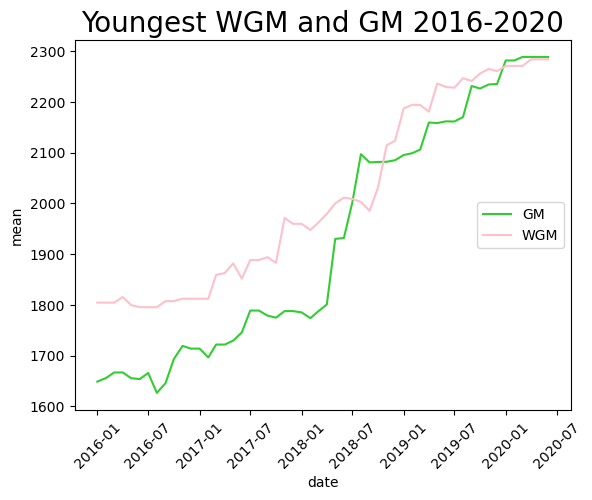

In [5]:
#set style 
sns.set(style='ticks', font='Arial', font_scale=1.5)

sns.set_context(rc={'font.size': 20,})

plt.figure(figsize=(8,10))
plt.style.use('default')


fig, ax = plt.subplots()

g1 = GMdf['date']
g2 = GMdf['mean']

wg1 = WGMdf['date']
wg2 = WGMdf['mean']

graph = sns.lineplot(g1, g2, color = 'limegreen', ax=ax)


sns.lineplot(wg1, wg2, color = 'pink', ax=ax )

graph.set_title('Youngest WGM and GM 2016-2020', size=20)



labels = ('GM', 'WGM')

plt.xticks(rotation = 45)
plt.legend(labels, loc = 'center right')
plt.show()



This visualisation demonstrates the career progress of the two youngest Man & Woman Grandmasters from 2016-2020. It shows that player1 is stronger from 2016-01 - 2018-07 and is taken over as player2 has a sharp improvement. Player1 catches up with a steep, but less dramatic improvement before the end of the year. The competition becomes so close that the players are virtually level for the 6-month period before the dataset ends. For this section, I chose to analyse the players in terms of their mean rating across 3 games. This is to assess their overall career progress in terms of all games. 

# Part 2 - Federations

Rank federations in descending order:

a)   By the number of masters.2 Since there are approximately 190 federations, you
can focus on the top-k, where 𝑘 ≈ 20.



To rank the federations I need to filter out only the members of the dataset that have one of the following titles in list 'masters'.

In [6]:

masters = ['GM', 'WGM', 'IM', 'WIM', 'FM', 'WFM', 'CM', "WCM"]

fed_GM = players[players.title.isin(masters)]

# Groupby federation and rank by size. 
fed = fed_GM.groupby('federation').size().sort_values(ascending=False).head(20)


Plotting a visualisation of the top federations ranked by number of Grandmasters. I have limited this value to 10 federations for visual clarity, although a greater number could be extracted. This view is appropriate since the federations after 1st and 2nd are similar in size.

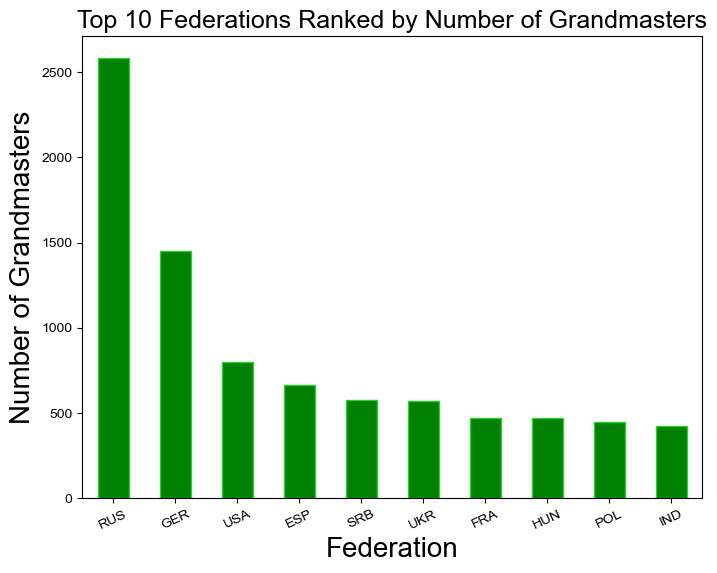

In [7]:
# set style
plt.figure(figsize=(8,6))
plt.style.use('default')


graph = fed.head(10).plot.bar(rot=25, color = 'green', edgecolor = 'limegreen')

#set to match the style of pt1 
plt.rc('font', **{'family':'sans-serif','sans-serif':['Arial'], 'size': 18})
plt.figsize = (10,20)
plt.title('Top 10 Federations Ranked by Number of Grandmasters', size = 18)
plt.ylabel('Number of Grandmasters', size = 20)
plt.xlabel('Federation', size =20 )

plt.show()



There is not much variation between the countries after 1st and 2nd place, but the difference between Russia and the rest of the world is huge, so I will visualise their dominance in terms of grandmasters compared to the next top 4 countries. It is interesting that China does not make the top 10, which perhaps could be explained by the other games played in China like Go. However, given the country's size I would expect a higher rank.

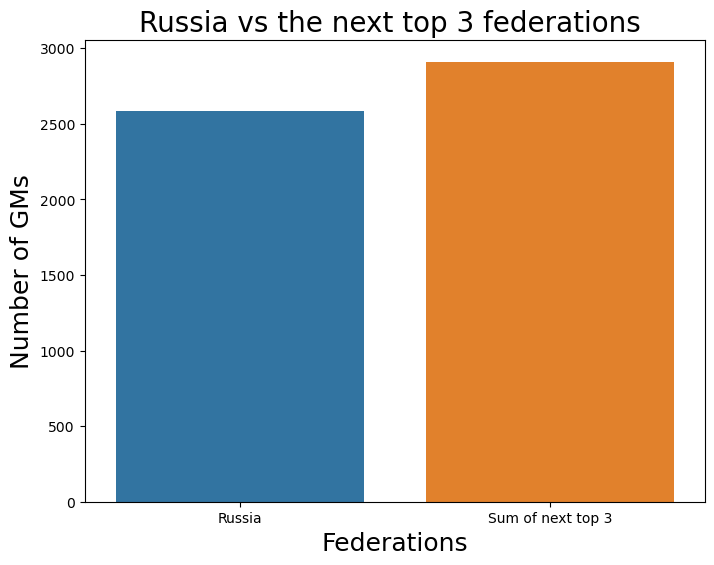

In [8]:
russia = fed.iloc[0]


#add together next 3 using slice indexing

ROW5 = fed.iloc[1:4].sum()

y = [russia, ROW5]

x = ['Russia', 'Sum of next top 3']

plt.figure(figsize=(8,6))
plt.style.use('default')


sns.barplot(x,y)
plt.title('Russia vs the next top 3 federations ', size=20)
plt.ylabel('Number of GMs', size =18)
plt.xlabel('Federations', size = 18)

plt.show()

As demonstrated, Russia has almost as many grandmasters as the next top 3 countries combined. They clearly dominate in this respect but I will contrast this with some other methods of ranking. I have used this view to illustrate the proportion of just Russia vs the next best 3 as this is the most similar comparison despite containing the counts for the next top ranked countries such as Germany and the USA. The sum of many more lower ranked countries could fit into Russia's GM with ease. 

I will now demonstrate another way of visualising federation ranks. I use a boxplot to visualise the distribution of data for each of the top 5 federations identified in the section above. I only rank in terms of the standard rating to maintain consistency because the mean score may not take into account discrepancies in the weighting of scores for each game category.

Prepping year by year ranking data from FIDE and merging data sets to include names, titles, rankings over time and more

In [9]:
# change the header names to match the other dataset
pd20 = pd20.rename({'fide_id': 'id', 'year':'2020'}, axis = 'columns')



# to get ratings for each player merge data sets on shared ID and drop missing values
#using list of gms only 
player_ratings = pd.merge(pd20, GM, on='id')

#player ratings df with federations and ratings 


#drop missing vals so they don't inlfuence the result
player_ratings.rating_standard = player_ratings.rating_standard.dropna()





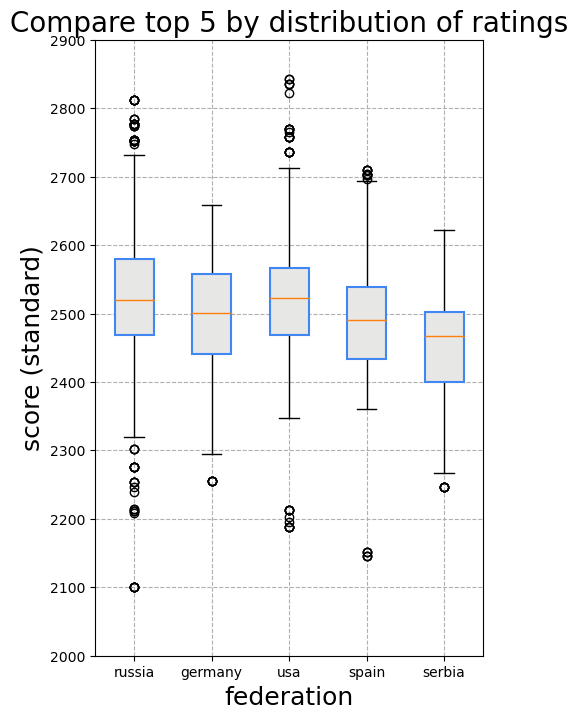

In [10]:
russia = player_ratings.loc[player_ratings.federation== 'RUS']['rating_standard']
ger = player_ratings.loc[player_ratings.federation == 'GER']['rating_standard']
usa = player_ratings.loc[player_ratings.federation == 'USA']['rating_standard']
esp = player_ratings.loc[player_ratings.federation == 'ESP']['rating_standard']
srb = player_ratings.loc[player_ratings.federation == 'SRB']['rating_standard']
labels = ['russia','germany','usa', 'spain', 'serbia']
teams = [russia,ger,usa, esp, srb]

plt.figure(figsize=(5,8))
plt.style.use('default')




boxes = plt.boxplot(teams, labels = labels, patch_artist = True, showfliers=True)



for box in boxes['boxes']:
    #set edge colour
    box.set(color = '#4286f4',
           linewidth = 1.5)
    
    box.set(facecolor='#e7e7e5')
    
plt.title('Compare top 5 by distribution of ratings', size=20)
plt.ylabel('score (standard)', size = 18)
plt.xlabel('federation', size = 18)
#select approproate view on y axis
plt.ylim(2000,2900)

#add a grid to make the diffferences more clear
plt.grid(linestyle = 'dashed')
plt.show()

This visualisation using a boxplot reveals some more interesting information about our top ranking federations. 

In terms of mean score, these federations are similarly rated. Russia has the highest number of grandmasters, although given this distribution, it might suggest that Russian's have more chess players, rather than being any better at it. This is also supported by the extent of outlier results outside of the upper and lower quartiles that shows that there is not a great deal of consistency. 

Despite being second in the federation ranking, Germany has a slightly lower mean, lower scorign outliers but less varied data. Furthermore, the US plots the highest ranking points of these federations. 

The key takeaway from this view is that the Russian dominance in terms of number of gradmasters is not reflected in any dominance in terms of skill.

# More Rankings

I will now consider 3 further rankings for comparison based on the three different game categories from the datasets. My results show a very different set of top 10 ranked countries depending on which view is taken. I have kept the game ratings separate for this view because it is not clear if the points are standardised for comparison across games and the rankings for each game type are quite different.



In [11]:
mean_rank_std = player_ratings.groupby('federation').mean().sort_values('rating_standard', ascending = False).copy()

plt.figure(figsize=(8,6))
plt.style.use('default')

graph = mean_rank.rating_standard.head(10).plot.bar(rot=25, color = 'green', edgecolor = 'limegreen')


plt.title('Top 10 Federations Ranked by standard rating', size = 20)
plt.ylabel('Mean standard rating', size = 20)
plt.xlabel('Federation', size =20 )
plt.ylim(2500, 2650)
plt.show()


mean_rank_blitz = player_ratings.groupby('federation').mean().sort_values('rating_blitz', ascending = False).copy()

plt.figure(figsize=(8,6))
plt.style.use('default')

graph = mean_rank_blitz.rating_blitz.head(10).plot.bar(rot=25, color = 'orange', edgecolor = 'blue')


plt.title('Top 10 Federations Ranked by blitz rating', size = 20)
plt.ylabel('Mean standard rating', size = 20)
plt.xlabel('Federation', size =20 )
plt.ylim(2500, 2650)
plt.show()


mean_rank_rapid = player_ratings.groupby('federation').mean().sort_values('rating_rapid', ascending = False).copy()

plt.figure(figsize=(8,6))
plt.style.use('default')

graph = mean_rank_rapid.rating_rapid.head(10).plot.bar(rot=25, color = 'darkred', edgecolor = 'blue')


plt.title('Top 10 Federations Ranked by rapid rating', size = 20)
plt.ylabel('Mean standard rating', size = 20)
plt.xlabel('Federation', size =20 )
plt.ylim(2500, 2700)
plt.show()




NameError: name 'mean_rank' is not defined

<Figure size 800x600 with 0 Axes>

There are a lot of federations between these graphs so I will draw attention to a couple of key findings.

TJK comes out in either first and second place in all ratings based on mean score. This is an interesting result since they do not appear in the rankings by number of grandmasters. It is possible to interrogate this further by examining the distribution of data for TJK, the mean across all three games, and the variance between game scores (i.e. are they consistently high or do they have a small number of very high rated players.)

While Russia has such an impressive grandmaster count, as does Germany, neither federation places when ranked by their mean count. This view also includes China ranking more highly than seen in the grandmaster ranking. These comparisons do not show a relationship between the number of grandmasters and avergae score in any of the games. 

This provides a different perspective altogether with none of the top ranked federations appearing again on this ordering. 

# Top players per federation

This visualisation shows the ordered-top-rated-player in their federation. Again, we get another picture of the rankings of chess players. I put the countries in order of their highest max score and attach that to the name of the players. This gives a player-level perspective based on federations finding the top rated player for each country. I have used the standard ratings here again, although it could be repeated easily for each game type or even for a mean rating of all three as calculated in part 1. The method I have employed would be particularly suited to picking players from each federation for a standard chess competition

In [ ]:

# picks the max standard rating for each group in order
max_rank = player_ratings.groupby('federation').max().sort_values('rating_standard', ascending=False)


plt.figure(figsize=(8,6))
plt.style.use('default')

#  federation as index

max_rank['federation'] = max_rank.index

#get names and federations for the top player

max_rank["federation, name"]  = '(' + max_rank['federation'] + ')' +', ' + max_rank['name']

#plot x and y 
x = max_rank['federation, name'].head(10)
y = max_rank['rating_standard'].head(10)

bars = sns.barplot(x=x, y=y)
plt.ylim(2660, 2950)

plt.title("Top Rated players by Federation", size=20)
plt.ylabel("Rating(standard)")
bars.set_xticklabels(labels = x,  rotation=25, ha='right', SIZE=10)
plt.show()

# Part 3 - WGMs
a) Which WGM played most games with other WGMs? Sort them in descending order. You can treat all online game types in the aggregate.


Load new dataset & ensure that both are for 2016-2020

In [ ]:
#load Games dataset and mappings as well as filtering columns with usecols
games = pd.read_csv('games.csv', usecols = ['game_id', 'end_time', 'time_class', 'wgm_username','white_username', 'black_username', 'black_result', 'white_username', 'white_result'])
mappings = pd.read_csv('mappings.csv', usecols = ['username', 'fid'])


#select games in range 2016-2020 

def _toint(s):
    """
    splits by space and - to break up datetime objects 
    """
    lst = s.split(' ')
    lst = s.split('-')
   
    return (lst[0])

years = ['2016', '2017', '2018', '2019', '2020']
games['end_time'] = games['end_time'].to_list()


#apply function to the end_time column
games['year'] = games.end_time.map(_toint, na_action='ignore')

#games is the new dataset of games from which we can take wgms from the mappings
games = games.loc[games.year.isin(years)].copy()



In [ ]:
#make usernames all lowercase & uniform
games['white_username'] = games['white_username'].str.lower()
games['black_username'] = games['black_username'].str.lower()

In [ ]:
#find all the wgms

wgm_users = games.wgm_username.unique()


#filter games wgmxwgm by finding (A|B) & (A|B)

wgm_games = games.loc[games.white_username.isin(wgm_users)& games.black_username.isin(wgm_users)].copy()
w = wgm_games.groupby('white_username').size()
b = wgm_games.groupby('black_username').size()

t = (w+b)
# add scores and rank

plt.figure(figsize=(8,6))


wgm_top = t.sort_values( ascending= False).head(10)
wgm_top.plot.bar(rot=40, color = 'green', edgecolor= 'limegreen')
plt.title('WGM ranked by number of games played', size = 20)
plt.ylabel('Number of Games Played', size = 16)
plt.xlabel('Username', size = 16)


plt.show()




The player with the highest number of games against other WGMs is kingmongmanh with significantly more games, followed by cukus. The rest of the players aren't separated by a huge proportion of values. With these results I could go on to look at the relationship between number of games played and score, to see whether more experienced players rate higher. 

# Suprising Results

b) Overall, has there been any surprising results in the games results?

In this section, I want to find a user with a low rating who is also playing black who beats their opponent. Since black must defend white's attack it is harder to win playing black, so this result is extra surprising. I calculate the proportion of black wins out of total wins to illustrate this. 

In this section I map user ids to their names. 

I find that the user has 6 surprise wins over 2 players in 2 different time categories.

I also find that one of the surprise wins is against one of the top ranking players in terms of number of games played. I am curious about her career progress so I will analyse her games further in the next section. 

In [ ]:
# number games played to ranking

#create lists of usernames, ids and a dictionary to translate one from the other
mappings 
users = list(mappings.username)
fids = list(mappings.fid)

dic = dict(zip(users, fids))



# finds the games played by wgms (b&w) in the mappings set 

mapped_games = games[games.white_username.isin(users) & games.black_username.isin(users)].copy()

# maps a new column to add id numbers to existing usernames in the df



mapped_games['white_fid'] = games.white_username.map(dic)
mapped_games['black_fid'] = games.black_username.map(dic)

# was a float for some reason change to int
mapped_games['white_fid'] = mapped_games.white_fid.map(int)
mapped_games['black_fid'] = mapped_games.black_fid.map(int)


#filters the years data by id number and sorts based on year and rating both ascending
#(lowest first)
pd_mapped = pd_years.loc[pd_years.fide_id.isin(fids)].copy()
pd_mapped.sort_values(['year', 'rating_blitz'], ascending = [True, True])

#set to the top 1 but can be more if necessary 

low = list(pd_mapped.fide_id.head(1))
answer = mapped_games.loc[mapped_games['black_fid'].isin(low)]

surprise = answer.loc[answer['black_result'] == 'win']

# extract some information about these surprise games 
name = surprise.black_username.unique()
yr = surprise.year.unique()
typ = surprise.time_class.unique()
white = surprise.white_username.unique()

rating = pd_mapped['rating_blitz']

num = len(surprise)

#to illustrate - proportion won 
black_wins = mapped_games[mapped_games.black_result == 'win']


print(f' {len(black_wins)} wins for black out of {len(mapped_games)} total games for mapped WGMs:')

print(f' which is only {float(len(black_wins)/len(mapped_games))*100}%')


print(f' Lowest rated blitz player, {name} takes {num} surprise win(s) playing black in  playing {typ} against higher rated {white} in {yr}')  

# Part b) Visualising games played by pairs

Following from the part above, I wanted to look more closely at Adriana Nikolva's (wgm_adriana_nikolova) performance. I examine her performance compared to another top player Dina Belenkaya looking at the 20 games they play against each other.

In [ ]:
# locate games for 2 players
wgm_players = ['wgm_adriana_nikolova', 'dinabelenkaya']

#make a new df view of just the pair playing each other ( total of 20 games )
df = wgm_games.loc[wgm_games.white_username.isin(wgm_players) & wgm_games.black_username.isin(wgm_players)].copy()



In this section I identify the players, add their usernames and ids from the mapping data 

In [ ]:
# a further mapping for wgm_players (might not need this anymore)
a = []
for i in wgm_players:
    b = mappings.loc[mappings.username.isin(wgm_players)]
    a.append(b['fid'])
#get the ids for these two 
a = a[1].to_list()
a.reverse()

d = dict(zip(a, wgm_players))


pair1 = pd_years.loc[pd_years['fide_id'].isin(a)].copy()

#add an id column to the data frame ( I think I did this already )
pair1['id'] = ('1')
pair1['id'] = pair1.fide_id

et = df.end_time.iloc[1]

import datetime

date_time_str = et[0:10]
et = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')

#CHANGES USING MAPPING DICT TO HAVE SEPARATE USERNAME AND ID COLS
pair1 = pair1.replace({'fide_id': d})
pair1 = pair1.rename({'fide_id': 'username'}, axis ='columns')




In [ ]:
# for each player find white win and black wins 

#DINA 
dina = df.loc[df.white_username == 'dinabelenkaya']
dina_b = df.loc[df.white_username == 'dinabelenkaya']
dina_win_white = dina.loc[dina.white_result == 'win'].copy()
dina_win_black = dina_b.loc[dina_b.black_result == 'win'].copy()


# concatenate dina's wins
dina_wins = pd.concat((dina_win_white, dina_win_black), axis=0)


#ADRI
adri = df.loc[df.white_username == 'wgm_adriana_nikolova']
adri_b = df.loc[df.black_username == 'wgm_adriana_nikolova']
adri_win_white = adri.loc[adri.white_result == 'win'].copy()
adri_win_black = adri.loc[adri.black_result == 'win'].copy()
adri_wins = pd.concat((adri_win_white, adri_win_black), axis=0)

typ = adri_wins.time_class.unique()

#Summary 

print(f' Adriana Nikolova wins {len(adri_wins)} times. Of these, {len(adri_win_white)} are won starting with white, {len(adri_win_black)} are won starting with black')


print(f' Dina Belenkaya wins {len(dina_wins)} times. Of these, {len(dina_win_white)} are won starting with white, {len(dina_win_black)} are won starting with black')

print(f'Games were type: {typ}')




On this analysis, Dina Belenkaya is the better player of the two, since she wins more times, and does so with a greater frequency starting with black. I will now visualise their career progress to see whether this is the case. 

In [ ]:
#create a datetime object to map x axis as dates from year motnh columns 
pd_years['date'] =  pd_years['year'].map(str)+ '-' +  pd_years['month'].map(str)

pd_years['date'] = pd.to_datetime(pd_years['date'], format= '%Y-%m')




#limits to just the pair
progress = pd_years.loc[pd_years['fide_id'].isin(a)].copy()


#tried to get these values from the list/dic defined above but didn't work for some reason
adr = ['2908689']
dna = ['24142654']


dina = progress[progress['fide_id'].isin(dna)].copy()
adri = progress[progress['fide_id'].isin(adr)].copy()


# plot

In [ ]:
# x and y values for each plauer
x1 = dina.date
y1 = dina.rating_blitz

x2 = adri.date
y2 = adri.rating_blitz


sns.set(style='ticks', font='Arial', font_scale=1.1)

sns.set_context(rc={'font.size': 20})


fig, ax = plt.subplots()
fig.figsize = (10,6)

graph1 = sns.lineplot(x=x1, y=y1, color = 'pink', ax=ax)

graph1 = sns.lineplot(x=x2, y=y2, color='green', ax=ax)


graph1.legend(['dina', 'adri'])

plt.title('Comparing Performance: Adriana Nikolova & Dina Belenkaya', size = 20)
plt.ylabel('Blitz Rating', size=20)
plt.xlabel('Date', size = 20)
plt.xticks(rotation = 45)


plt.axvline(x= et, color = 'darkred', linestyle = 'dashed', label = 'play')
plt.text(et, y = 2150, s = '      Adri Vs Dina 2020-05',rotation=0, color = 'darkred', size =12)

plt.show()

In this visualistion, the red line represents the date on which these players played the 20 games. Unfortunately as all games were played at the very end of the period we have data for it is not possible to see the impact of these games on rating. However, alongisde the information extracted above about win rate we can understand the fixtures better by looking at the difference in rating between players, not just at the time of the game but in the last 4 years of their playing history. The stronger rated player did come out on top, as expected, but the distribution of wins was close (8/10), which is reflected by the graphs showing the pair both enjoying periods of higher ratings. As anticipated, Dina is the highest rated player (these ratings are for blitz since this is the type of game played).

The data shows that Adriana Nikolova has suffered a decline in rating over the past 2 years, that persists into her match with Dina Belenkaya. Despite this, her overall score in the past 5 years has not dipped as low as opposition. 

# Ethical Implications 


This analysis is based on data science techniques. These methods provide an insight into patterns and relationships between federation and players ratings and games across time,  based on different interpretations of their scores.

The nature of this analysis means that patterns can be drawn, but that causal factors for the difference must be attributed by human analysis. Many factors might be inferred from the observed difference, but this inference is not guaranteed to be correct. There are insitances where I have suggested explanations for observed difference in the data, such as the ranking of China in terms of grandmasters. 

Furthermore, the quality of the data used will influence the outcome. A representative sample of data should 'represent' the world as it actually is. On the other hand, missing values, outliers and more can skew the data so that it does not reflect reality. 


The view of the data presented must also be chosen, and this too can influence the picture painted by the data. As observed, each player has 3 ratings, and how this is dealt with influences the outcomes of analysis, as do factors such as rating in terms of grandmasters, mean ranking and highest ranking. Because of these factors, there are ethical implications to consider when the inferences drawn from data have real world consequences. 

Another ethical concern is the use of personal identifiers from the mapping dataset. Since GDPR protects personal data, meaning ["(information relating to an identified or identifiable natural person (‘data subject’)" .(https://www.itgovernance.eu/blog/en/the-gdpr-what-exactly-is-personal-data")

[Chess.com](https://www.chess.com)
Online chess playing platform with 20,000,000 members

[FIDE](https://www.fide.com)
International Chess Federation

[GDPR](https://www.itgovernance.eu/blog/en/the-gdpr-what-exactly-is-personal-data")
Regulations concerning personal data 

[Kaggle.com](https://www.kaggle.com)
Large collection of datasets for Data Science

[Markdown Tutorial](https://commonmark.org/help/tutorial/07-links.html)

[Keith Galli Youtube Tutorials](https://www.youtube.com/channel/UCq6XkhO5SZ66N04IcPbqNcw)
Youtube channel containing tutorials for pandas, matplotlib, seaborn and more.

[Importance of Data Science](https://www.zarantech.com/blog/importance-of-data-science/)